# X-Ray Emission Spectra
**by <span style="color:darkgreen">Christian Vorwerk</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Megha Arya</span> and <span style="color:darkgreen">Mara Voiculescu</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, we will show how to perform **X-ray** emission spectra (**XES**). To do so, we show the example of the F **K**-edge emission in LiF.

<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">
    
**Table of Contents**

[0. Before Starting](#0)
    
[1. Introduction](#1)
    
[2. The F-K Edge in LiF](#2)
    


<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Introduction</span>

The calculation of x-ray emission spectra is similar to that of the x-ray absorption spectra, and we will assume in the following that you have already finished the tutorial **Excited states from BSE**. The main difference resides in the initial states of the transitions, which are **core states**. As such, they are solutions of the radial Dirac equation in the muffin-tin spheres.

A description of the basic setup for **BSE** calculations can be found in the tutorial **X-ray Absorption Spectra using BSE**. In addition, all the input parameters are described in **[Input Reference](https://www.exciting-code.org/home/about/input-reference)**. Note that, in order to obtain reliable **X-ray** emission spectra, the calculation needs to be converged with respect to several parameters, such as the size of the **k**-mesh.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. The F-K Edge in LiF</span>

In a first step, we calculate the electronic groundstate of LiF with the following input file (do not forget to change the path in <code><span style="color:mediumblue">speciespath</span></code>).

<span class="LiF_BSE"></span>
```xml
<input>                                                                         
 
   <title>LiF-BSE: Ground-State Calculation</title>                                                       
 
   <structure speciespath="$EXCITINGROOT/species">                                                 
      <crystal scale="7.608">                                                   
         <basevect>0.5 0.5 0.0</basevect>                                       
         <basevect>0.5 0.0 0.5</basevect>                                       
         <basevect>0.0 0.5 0.5</basevect>                                       
      </crystal> 
      <species speciesfile="F.xml">                                             
         <atom coord="0.5000  0.5000  0.5000" />                                
      </species>
      <species speciesfile="Li.xml">                                            
         <atom coord="0.0000  0.0000  0.0000" />                                
      </species>                                                                                                     </structure>                                                                 
 
   <groundstate                                                                 
      do="fromscratch"                                                          
      ngridk="10  10  10"                                                       
      xctype="GGA_PBE_SOL"                                                      
      gmaxvr="14.0"/> 
</input>

```

Create a new directory, which you can call, *e.g.*, **run_LiF_XES**.

In [1]:
%%bash 
mkdir -p run_LiF_XES

Then, save the text of the example above for the ground state of LiF into the file **input.xml**

In [2]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("04_tutorial_xray_emission_spectra", "LiF_BSE")

# Write out the input as an XML file:
with open('./run_LiF_XES/input.xml', "w") as fid:
    fid.write(input_str)

Replace the **$EXCITINGROOT** variable with the correct path by using the command:

In [3]:
%%bash
cd run_LiF_XES
python3 -m excitingscripts.setup.excitingroot
cd ..

Run the ground-state calculation with the usual command:

In [4]:
%%bash
cd run_LiF_XES
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml


   Elapsed time = 1m27s


After the ground-state calculation is completed, we inspect the output file **EVALCORE.OUT**, which contains the information about core electrons. Since we are interested here in the excitations from the flouride **K**-edge, we have to look specifically for the F **1*s*** electron. For this purpose we have to consider the core state with quantum numbers ***n*=1** and ***l*=0**:

<div style="background-color: rgb(224, 224, 224);">
    
```bash
Species :    1 (F), atom :    1
 n =  1, l =  0, k =  1 :   -23.88933298 
```
</div>

From the file **EVALCORE.OUT** we obtain the information that the F **1*s*** electron in LiF has a binding energy of about -23.89 Ha. With this knowledge, we can add to the input file the parameters required to perform a **XES** calculation. Since we are dealing with excited-state properties, we have to insert the <code><span style="color:green">xs</span></code> element. Add the following block into the input file:


```xml
...
      
   <xs                                                                             
      xstype="BSE"                                                              
      ngridk="4 4 4"                                                            
      vkloff="0.097 0.273 0.493"                                                
      ngridq="4 4 4"                                                            
      nempty="30"                                                               
      gqmax="3.0"                                                               
      broad="0.007"                                                             
      scissor="0.20947"                                                         
      tevout="true">                                                            
 
      <energywindow                                                             
         intv="23.9 24.1"                                                       
         points="1200"/>                                                        
 
      <screening                                                                
         screentype="full"                                                      
         nempty="100"/>                                                         
 
      <BSE                                                                      
         xes="true"                                                             
         bsetype="IP"                                                      
         xasspecies="1"                                                         
         xasatom="1"                                                            
         nstlxas="1 5"                                                          
         />                                                                     
 
      <qpointset>                                                               
         <qpoint>0.0 0.0 0.0</qpoint>                                           
      </qpointset>                                                              
 
   </xs>  

...

```

You should be already familiar with many parameters shown above. However, three parameters are unique for XES calculations:

- The attribute <code><span style="color:mediumblue">xes</span>=<span style="color:firebrick">"true"</span></code> in the <code><span style="color:green">BSE</span></code> element triggers the x-ray emission calculation;
- In XES calculations, the attribute <code><span style="color:mediumblue">nstlxas</span></code> describes the number of **occupied states** used in the **BSE**-Hamiltonian. In the XES process, valence electrons fill the core hole, and with this parameter, we specify which valence states are included in the calculation. In the example above, we use all 5 valence bands of LiF.
- While for x-ray absorption, the interaction of the excited electron and the core hole has a significant influence on the spectrum, there is no core hole in the final state of the x-ray emission process. Therefore, <code><span style="color:mediumblue">bsetype</span>=<span style="color:firebrick">"IP"</span></code> has to be chosen to obtain results that can be compared with experimental ones. More details can be found **[<span style="color:firebrick">here</span>](https://edoc.hu-berlin.de/handle/18452/22938)**.

Do not forget to skip the ground-state run by inserting the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> inside the <code><span style="color:green">groundstate</span></code> element.

In [5]:
# The following lines modify the input.xml using Python
from excitingtools import ExcitingInputXML, ExcitingXSInput

parsed_input = ExcitingInputXML.from_xml('./run_LiF_XES/input.xml')

xs = {'xstype': 'BSE', 'ngridk': [4, 4, 4], 'vkloff': [0.097, 0.273, 0.493], 'ngridq': [4, 4, 4], 'nempty': 30,
      'gqmax': 3.0, 'broad': 0.007, 'scissor': 0.20947, 'tevout': True,
      'energywindow': {'intv': [23.9, 24.1], 'points': 1200},
      'screening': {'screentype': 'full', 'nempty': 100},
      'BSE': {'xes': True, 'bsetype': 'IP', 'xasspecies': 1, 'xasatom': 1, 'nstlxas': [1, 5]},
      'qpointset': [[0.0, 0.0, 0.0]]}

parsed_input.xs = ExcitingXSInput(**xs)
parsed_input.groundstate.do = "skip"

parsed_input.write('./run_LiF_XES/input.xml')

We are now ready to run the calculation with the usual command:

In [6]:
%%bash
cd run_LiF_XES
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml


   Elapsed time = 5m13s


The calculation will run for a few seconds. The output will be the same as those described in the tutorial **Excited states from BSE**. The x-ray emission spectra are given by the imaginary part of the dielectric function (as in the case of x-ray absorption).

In order to visualize the results, we execute the following commands:

In [12]:
%%bash
cd run_LiF_XES
cp EPSILON/EPSILON_BSE-IP_SCR-full_OC11.OUT epsilon-IP
python3 -m excitingscripts.plot.files -f epsilon-IP  -lx 'Energy [eV]'  -ly 'Im $\varepsilon_M$'  -t 'Macroscopic dielectric function'  -g  -rc  -cy 3  -x 650 656  -nl
cd ..

<figure>
<img src=" 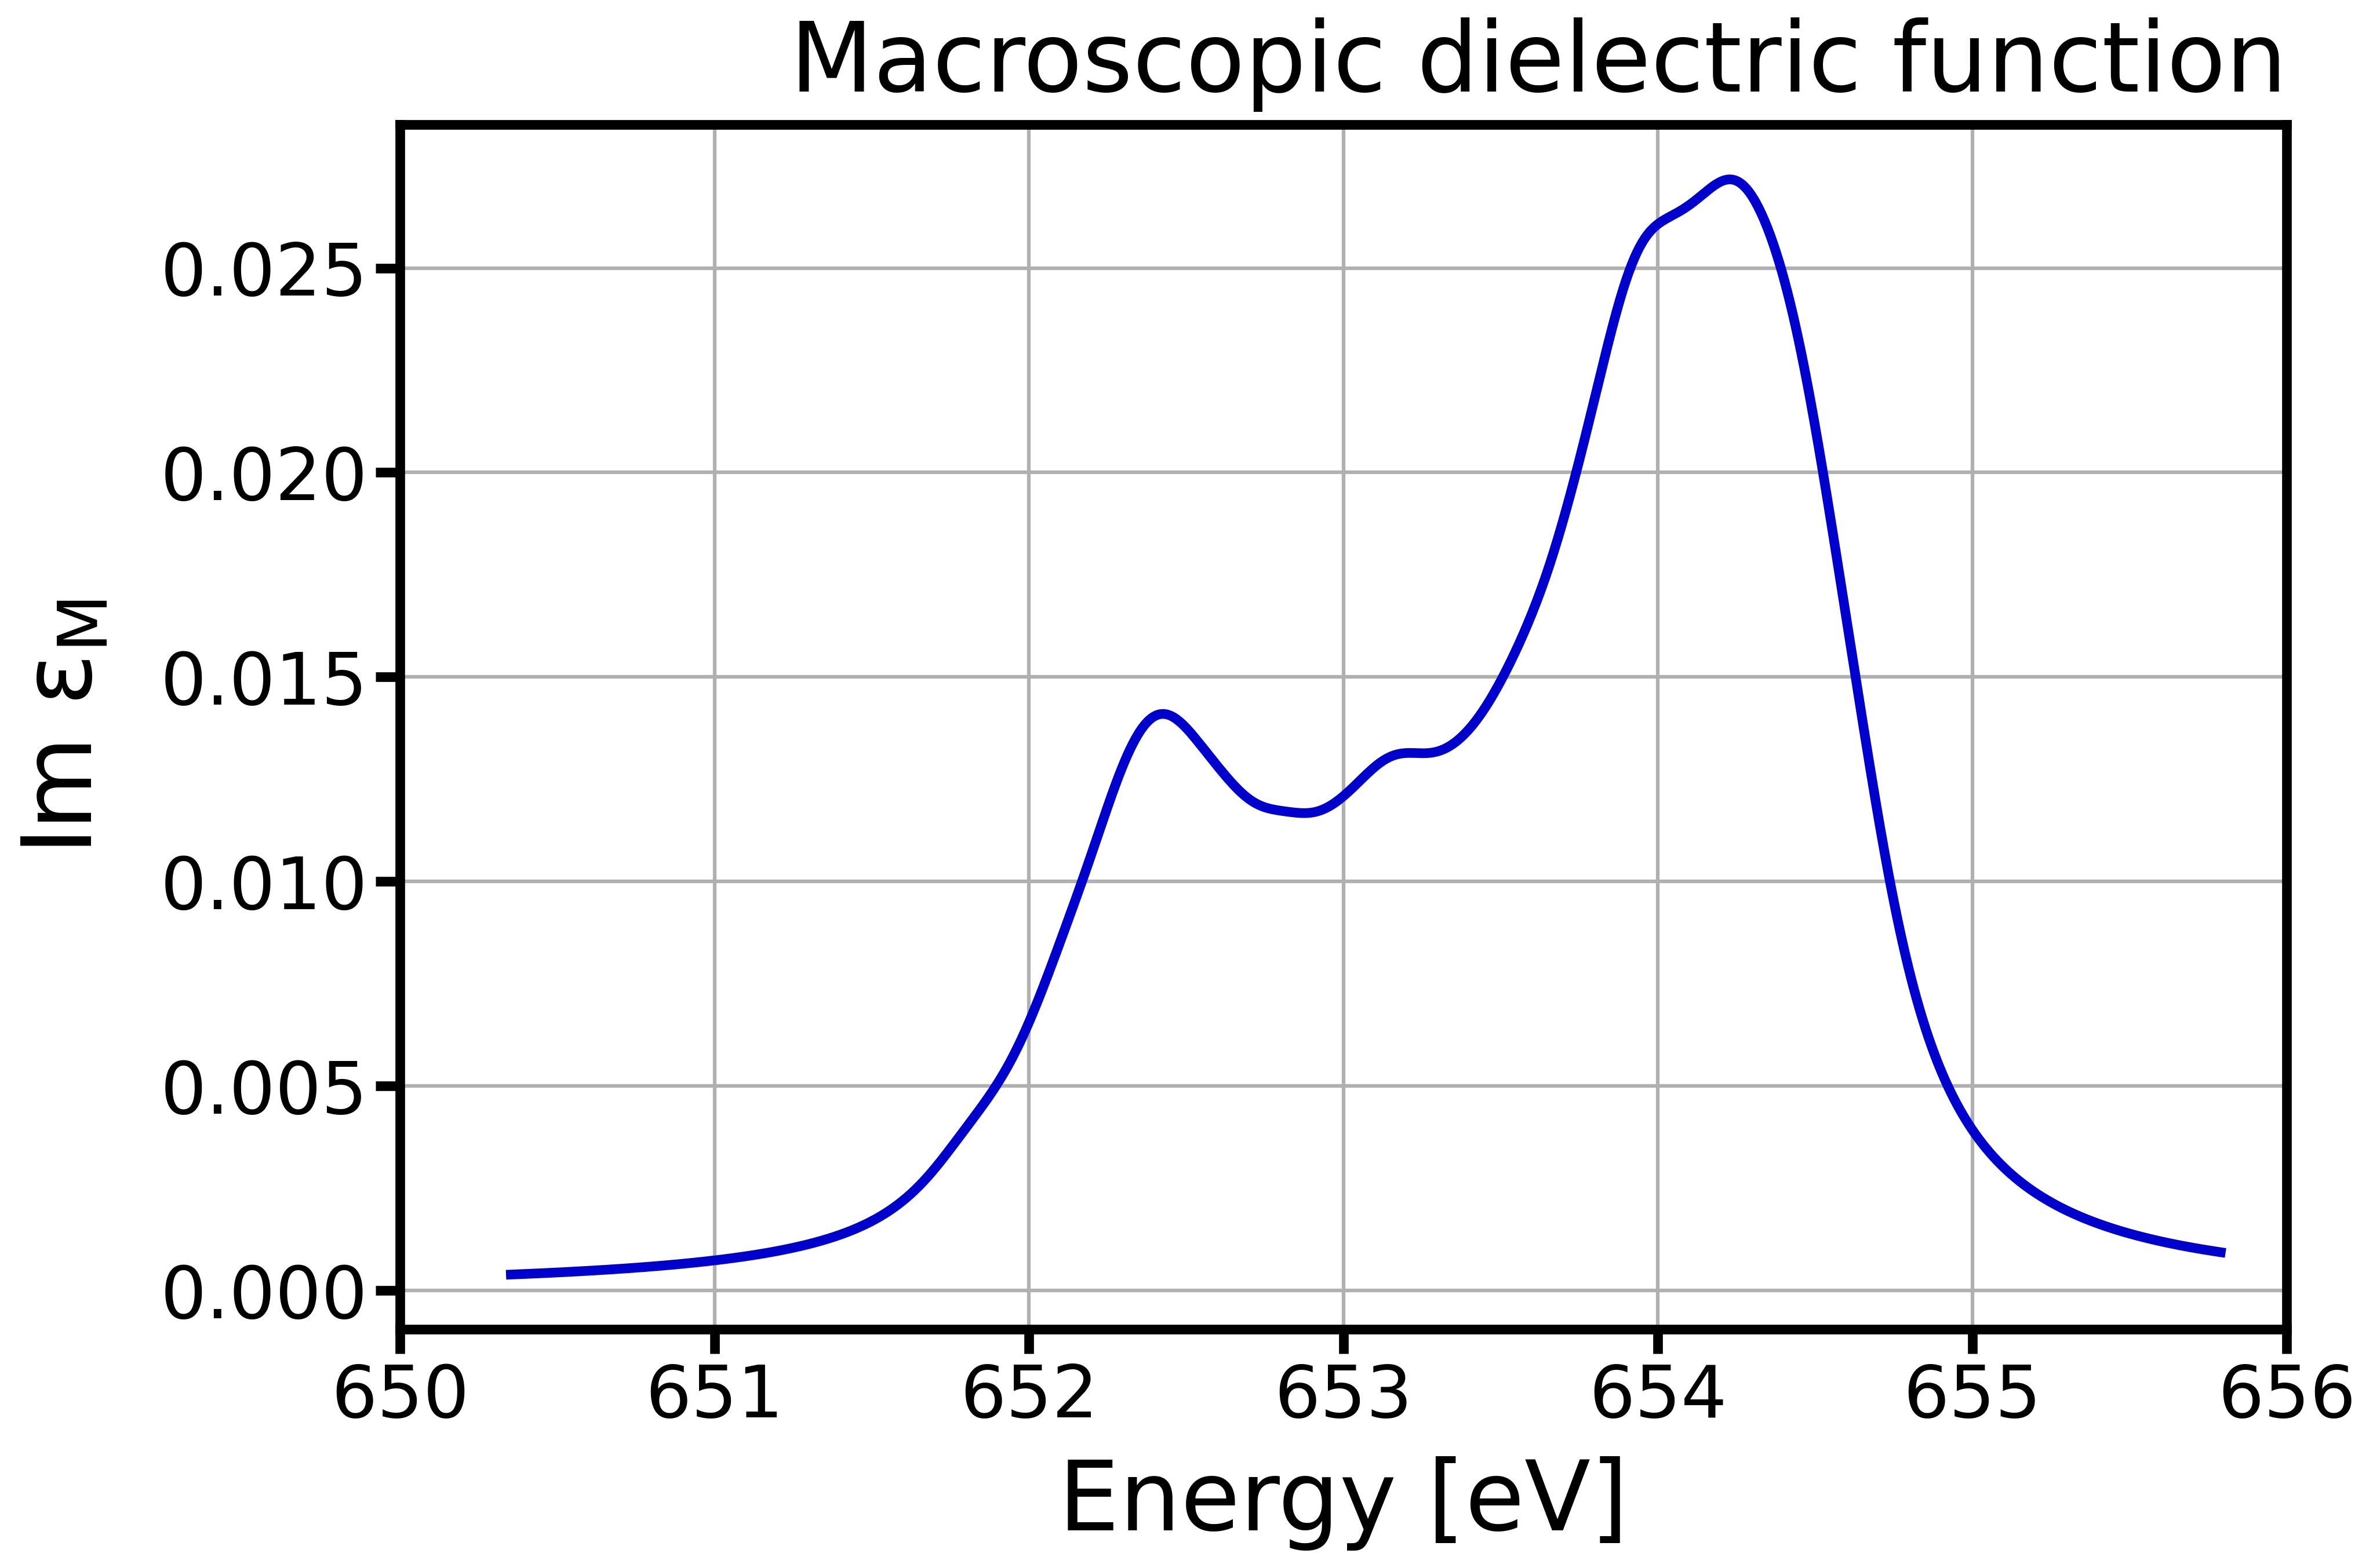" width="600" align="left"/>
</figure>

<hr style="border:2px solid #DDD"> </hr>